## **Identificação de um modelo (Motor Gerador) de primeira ordem em torno de um ponto de operação**

Laboratório de controle - 2023.2\
Turma: T03

Coordenador: Cleison Silva

<br>

Alunos:

Andrez Muller Miranda Barreto\
Matrícula: 201833940007

Oséias Dias de Farias\
Matrícula: 201733940002

Thalia Damasceno Barroso\
Matrícula: 201633940040

<br>

___


### **Introdução:**

A identificação de sistemas de primeira ordem é um processo utilizado na área de controle de sistemas para determinar os parâmetros de um modelo matemático de um sistema dinâmico de primeira ordem. Um sistema de primeira ordem é caracterizado por uma equação diferencial de primeira ordem, que tem como princiapal característica um ganho $K$ e uma constante de tenmpo $\tau$.

O processo de identificação de sistemas de primeira ordem envolve a coleta de dados experimentais do sistema, que são utilizados para estimar os parâmetros desconhecidos do modelo matemático. Uma vez que os parâmetros do modelo matemático foram identificados, é possível utilizar esse modelo para projetar controladores para o ponto de operação ao qual o modelo foi identificado. A identificação de sistemas de primeira ordem é uma importante ferramenta para a engenharia de controle e é utilizada em uma ampla gama de aplicações, incluindo processos industriais, controle de temperatura e controle de posição de sistemas mecânicos.

---

### **Objetivo:**

- Encontrar, analisar e validar uma função de transferência de primeira ordem para a Planta Motor-Gerador.

<center>
<div class="figure" >
  <p>Figura 1 - Bancada Motor/Gerador.</p>
  <img src="https://github.com/Oseiasdfarias/lab_control/blob/main/Resposta%20Sistema%20de%20Primeira%20Ordem/Figuras/sistema_gerador_motor.jpeg?raw=true"
       width="55%"> 
  <p>Fonte - Autor.</p>
</div>
<center/>

$$ G(s) = \frac{K}{\tau s + 1}  \tag{1} $$

$$ y(t) = K A (1 - e^{ - \frac{t}{\tau}}), ~\forall t \geq 0 \tag{2} $$

## Exercício

**1. Mostre que para uma entrada degrau de amplitude $A$ a resposta do sistema $(1)$ é dada pela equação $(2)$.**


A transformada de Laplace do degrau de amplitude $A$ é dada pela equação abaixo,

$$
    \mathcal{L}\{A\} = \dfrac{A}{s}
$$

Com isso, pode-se obter a resposta ao degrau como segue:

$$
    Y(s) = \frac{K}{\tau s + 1} \cdot \frac{A}{s}
$$

A partir da expressão acima, é possível realizar a transformada de laplace inversa, para isso é preciso decompor o sistema em frações parciais, como mostrado abaixo:

$$
    \frac{K}{\tau s + 1} \cdot \frac{A}{s} = \frac{KA}{s} - \frac{KA}{\tau s + 1}
$$

Por fim, pode - se aplicar a transformada inversa em ambos os lados:

$$
    \mathcal{L}^{-1}\{Y(s)\} = \mathcal{L}^{-1}\{\frac{KA}{s} - \frac{KA}{\tau s + 1}\}
$$

Assim, o sistema tem resposta no tempo dada por:

$$
    y(t) = KA - KA e^{-\frac{t}{\tau}} = KA(1-e^{-\frac{t}{\tau}})
$$


---

**2. Assuma que $y(\infty) = 3$ para um degrau de $0.5$ de amplutude. Determine o o valor do ganho do sistema ($K = ~ ? $).**


Para um sistema de primeira ordem, a resposta ao degrau é dada por:

$$
    y(t)=KA(1-e^{-\frac{t}{\tau}})
$$

Portanto, para um degrau de amplitude $0.5$, temos: 

$$
    y(t) = K(0.5)(1-e^{-\frac{t}{\tau}})
$$

Para $t \rightarrow \infty$, temos que $e^{-\frac{t}{\tau}} \rightarrow 0$. Portanto, $y(\infty) = K(0.5) = 3$. Logo, temos:

Quando o tempo $t$ tende para o infinito, a parcela exponencial da resposta do sistema tende a zero, com isso, se obtem a expressão abaixo,

$$
    K = \frac{3}{0.5} = 6
$$

Logo, o valor de $K$ é $ K=6 $. 


---

**3. Para $K=1,63$ e $A = 2$. Determine a constante de tempo do sistema.**

Um sistema de primeira ordem tem que para se obter o valor de $\tau$ pode-se usar a seguinteexpressão:

$$
    \tau = \frac{1}{K \cdot A}
$$

Dessa forma, ao substituir os valores dados no enunciado, tem se:

$$
    \tau = \frac{1}{1,63 \cdot 2} \approx 0,306
$$


---

**4. Explique porquê para valores de $\tau < 0$ o sistema é instável.**

Para $\tau < 0$ o pólo do sistema fica no semi-plano direto do plano complexo, e a teoria de controle nos mostra que para essa configuração sistema é instável.

---

In [51]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import control as ct
import scipy.signal as sg
from control.matlab import *

%config InlineBackend.figure_format='retina'

A partir dos dados obtidos será possível encontrar o ganho $K_m$ e a constante de tempo $\tau$.

In [52]:
dados = pd.read_csv("../data/50pc_dados_motorgerador.csv", header = None, sep=';').values
dados

array([[0.  , 8.5 , 0.  ],
       [0.02, 8.5 , 0.  ],
       [0.04, 8.5 , 0.  ],
       ...,
       [7.94, 6.5 , 2.11],
       [7.96, 6.5 , 2.1 ],
       [7.98, 6.5 , 2.11]])

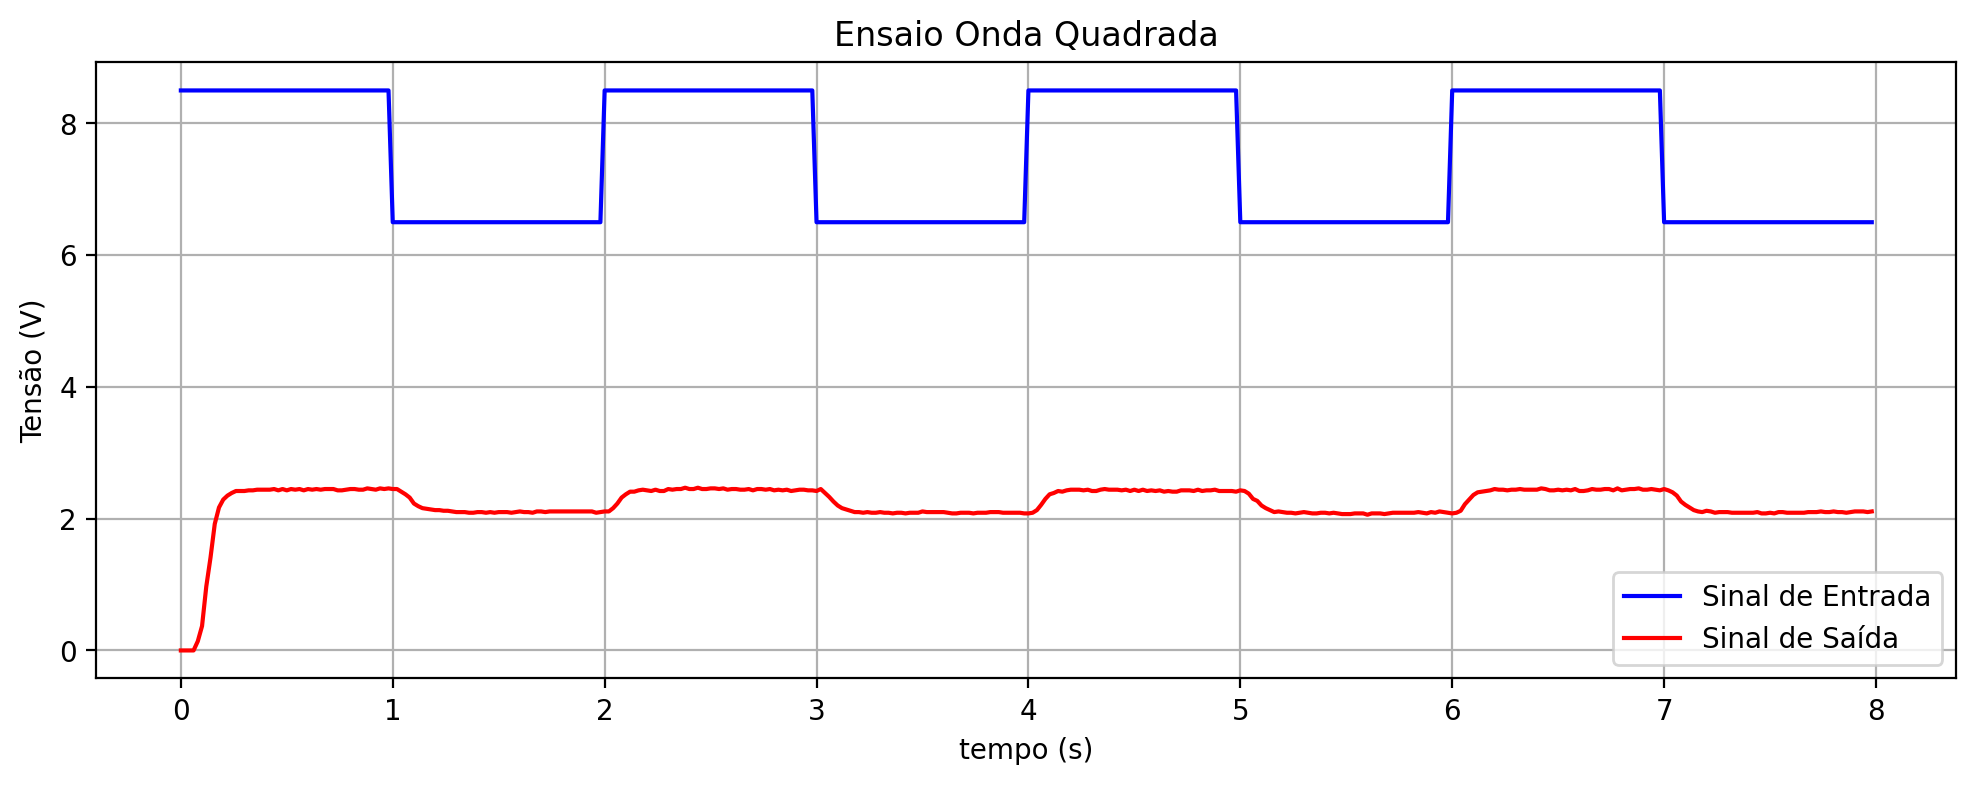


 Periodo de Amostragem: 0.02


In [53]:
# Dados
tempo = np.array(dados[:,0])
sinal_entrada  = np.array(dados[:,1])
sinal_saida = np.array(dados[:,2])
# toc = dados[3, :]

plt.figure(figsize=(12, 4))
plt.plot(tempo, sinal_entrada, c = 'b', label = "Sinal de Entrada")
plt.plot(tempo, sinal_saida, c = 'r', label = "Sinal de Saída")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

# plt.figure()
# plt.plot(tempo,toc)
# plt.show()

Ts = 0.02
print('\n','Periodo de Amostragem:', Ts)

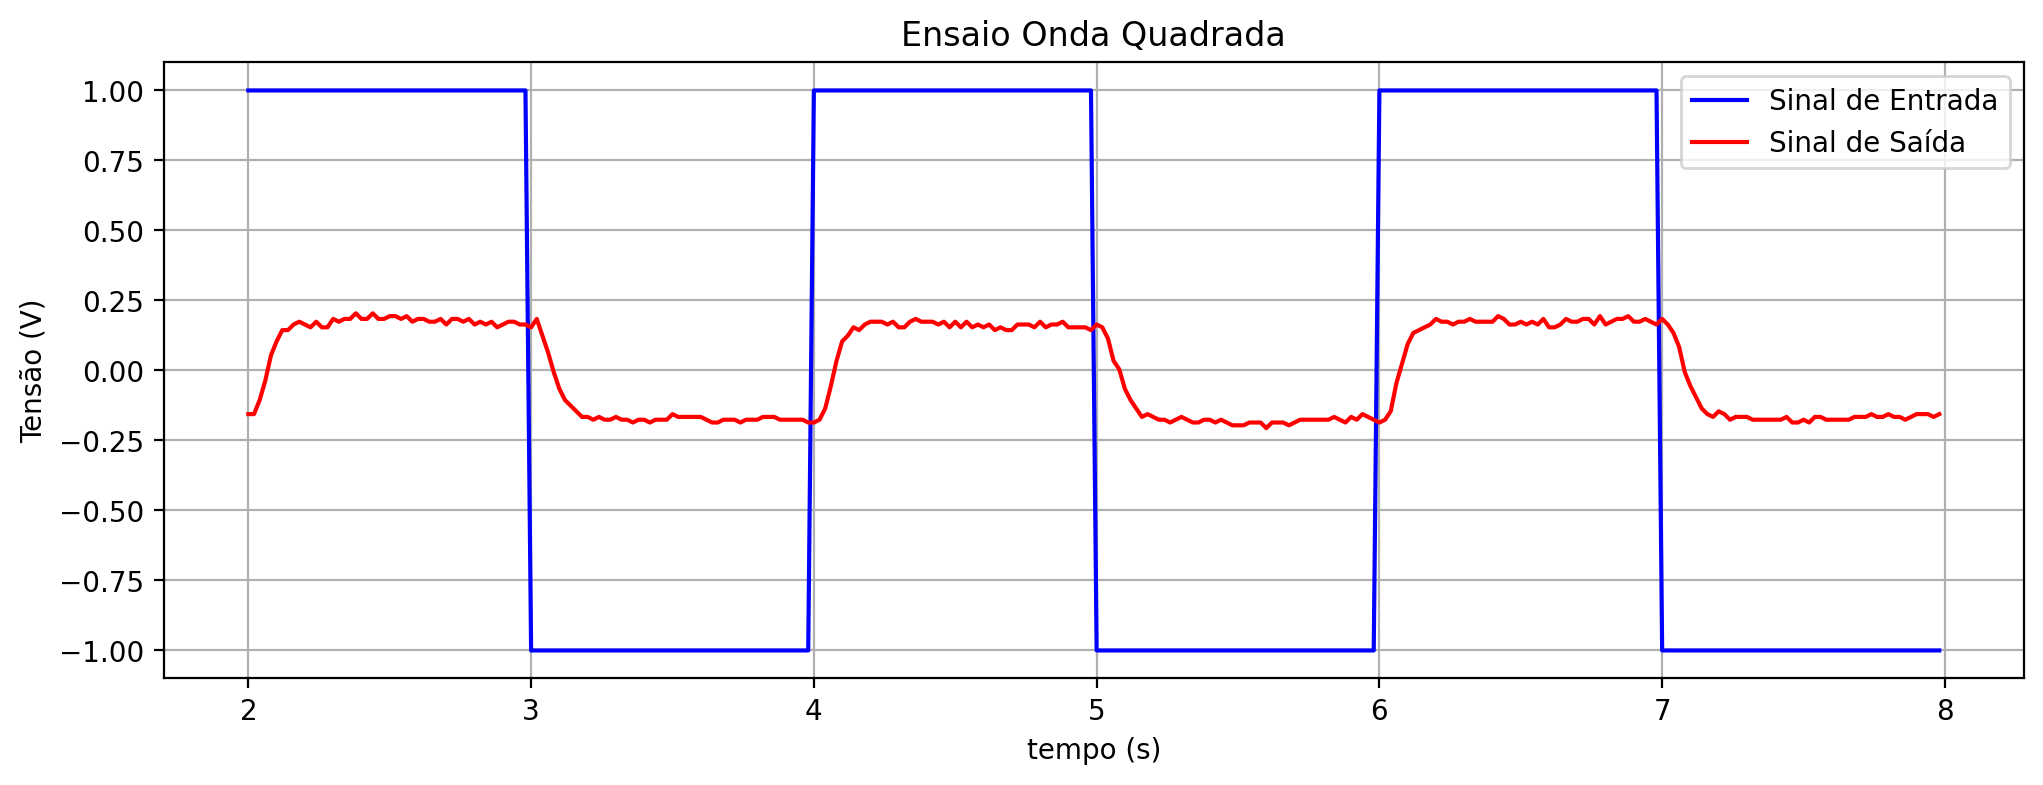

Nivel DC entrada: 7.5
Nivel DC saída: 2.265966666666667


In [54]:
# Define janela que despreza os primeiros instantes do ensaio

janela = (tempo>2) & (tempo<14)

# Obtendo o nível DC da entrada
nivel_dc_entrada = np.mean(sinal_entrada[janela])

# Obtendo o nível DC da saída
nivel_dc_saida = np.mean(sinal_saida[janela])

# Remove Nivel DC da Entrada e da Saída
r = sinal_entrada - nivel_dc_entrada
y = sinal_saida - nivel_dc_saida

# Plotagem dos gráficos dos sinais de entrada e saída sem nível DC
plt.figure(figsize=(12, 4))
plt.plot(tempo[janela],r[janela], c = 'b', label = "Sinal de Entrada")
plt.plot(tempo[janela],y[janela], c = 'r', label = "Sinal de Saída")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

print("Nivel DC entrada:" , nivel_dc_entrada )
print("Nivel DC saída:" , nivel_dc_saida )

# Identificação de um modelo de primeira ordem em torno de um ponto de operação

$$\boxed{G(s) = \frac{\Delta Y(s)}{\Delta U(s)} = \frac{K}{\tau s + 1}, ~ K = \frac{\delta y}{\delta u}, ~ \tau = t(63 \%) }$$


Para encontrar o ganho $K_m$ foi feito o calculo para diferentes intervalos de tempo, com os valores obtidos se obteve a média. o mesmo procedimento foi realizado para se obter $\tau$.



Ganho do Sistema
Valores de Km : [0.19, 0.185, 0.19]


Constante de Tempo do Sistema

Valores de tau : [0.09, 0.09, 0.09]


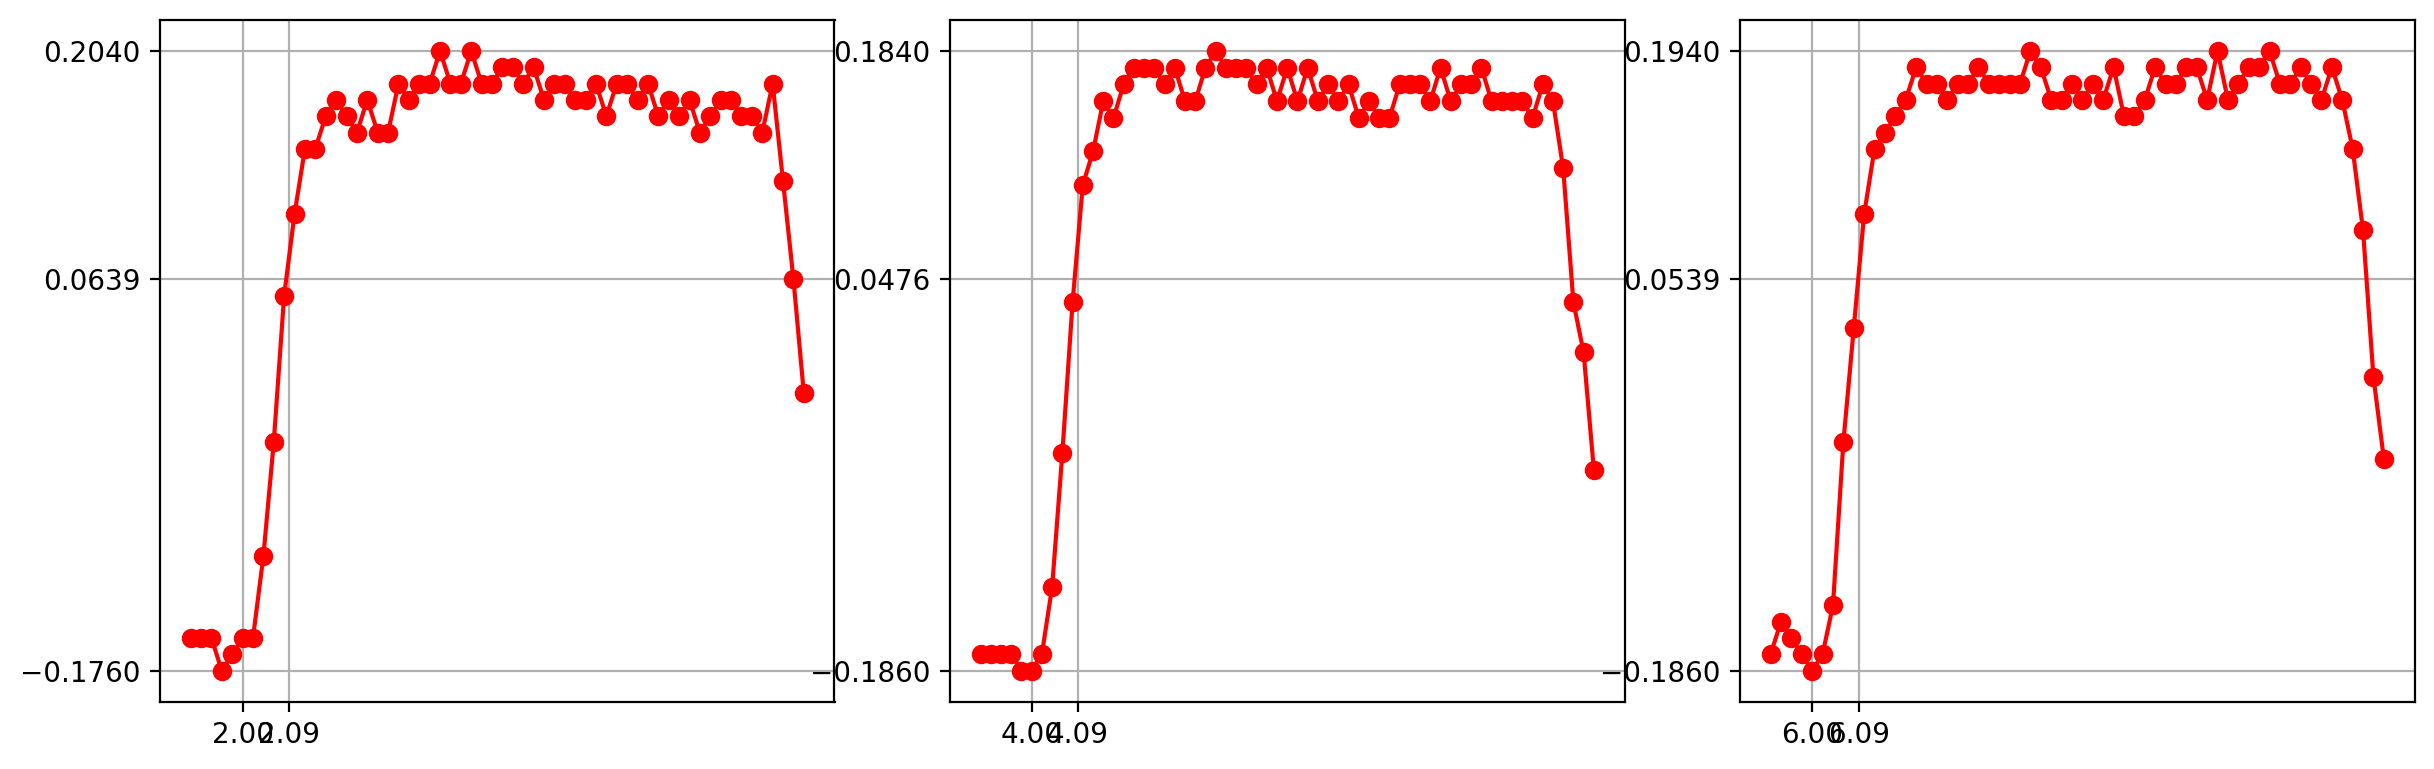

In [55]:
# Função para obter os valores de cada variação do sinal de saída
def calculo_km_tau(tempo, y, inicio=3.9, fim=5.1):
    index = (tempo > inicio) & (tempo < fim)
    t = tempo[index]
    y = y[index]
    ymin = np.min(y)
    ymax = np.max(y)

    delta_y = abs(ymax - ymin)
    ytau = (0.6312*delta_y) + ymin

    return [t, y], [ytau, delta_y, ymin, ymax]

# Obtendo os intervalos de subida do sinal de saída para plotagens
ty1, ymm1 = calculo_km_tau(tempo, y, inicio=1.9, fim=3.1)
km1 = ymm1[1]/2.

ty2, ymm2 = calculo_km_tau(tempo, y, inicio=3.9, fim=5.1)
km2 = ymm2[1]/2.

ty3, ymm3 = calculo_km_tau(tempo, y, inicio=5.9, fim=7.1)
km3 = ymm3[1]/2.


print("\n\nGanho do Sistema")
kms = [km1, km2, km3]
print(f"Valores de Km : {[round(km, 5) for km in kms]}")

print("\n\nConstante de Tempo do Sistema\n")
taus = [0.09, 0.09, 0.09]
print(f"Valores de tau : {taus}")

# Subgráficos de cada intervalo de subida do sinal de saída
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
plt.tight_layout()
ax[0].plot(ty1[0], ty1[1], '-or')
ax[0].set_yticks([ymm1[2], ymm1[0], ymm1[3]])
ax[0].set_xticks([2, 2.09])
ax[0].grid()

ax[1].plot(ty2[0], ty2[1], '-or')
ax[1].set_yticks([ymm2[2], ymm2[0], ymm2[3]])
ax[1].set_xticks([4, 4.09])
ax[1].grid()

ax[2].plot(ty3[0], ty3[1], '-or')
ax[2].set_yticks([ymm3[2], ymm3[0], ymm3[3]])
ax[2].set_xticks([6, 6.09])
ax[2].grid()

plt.show()



Ganho do Sistema
Valores de Km : [0.185, 0.185, 0.185]


Constante de Tempo do Sistema

Valores de tau : [0.095, 0.09, 0.09]


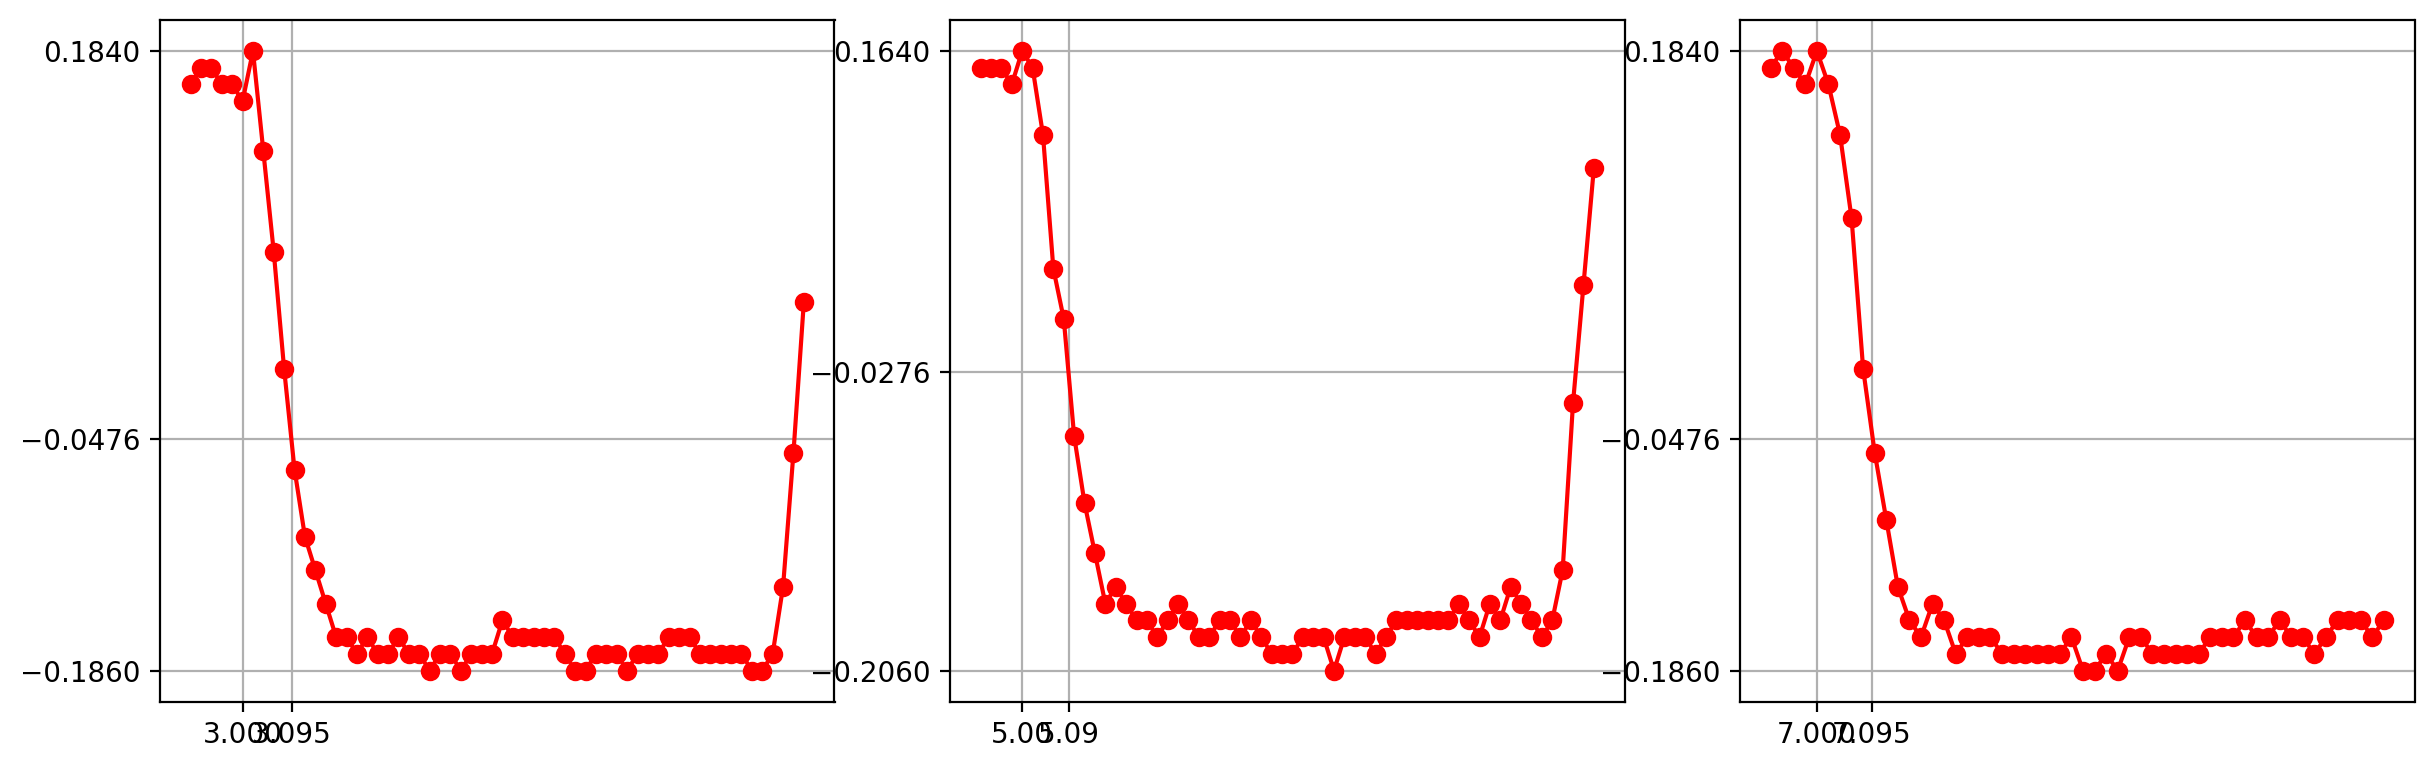

In [56]:
# Função para obter os valores de cada variação do sinal de saída
def calculo_km_tau1(tempo, y, inicio=2.9, fim=4.1):
    index = (tempo > inicio) & (tempo < fim)
    t = tempo[index]
    y = y[index]
    ymin = np.min(y)
    ymax = np.max(y)

    delta_y = abs(ymax - ymin)
    ytau = -((0.6312*delta_y) + ymin)

    return [t, y], [ytau, delta_y, ymin, ymax]

# Obtendo os intervalos de subida do sinal de saída para plotagens
ty_1, ymm_1 = calculo_km_tau1(tempo, y, inicio=2.9, fim=4.1)
km_1 = ymm_1[1]/2.

ty_2, ymm_2 = calculo_km_tau1(tempo, y, inicio=4.9, fim=6.1)
km_2 = ymm_2[1]/2.

ty_3, ymm_3 = calculo_km_tau1(tempo, y, inicio=6.9, fim=8.1)
km_3 = ymm_3[1]/2.

print("\n\nGanho do Sistema")
k_ms = [km_1, km_2, km_3]
print(f"Valores de Km : {[round(km, 4) for km in k_ms]}")

print("\n\nConstante de Tempo do Sistema\n")
taus2 = [0.095, 0.09, 0.09]
print(f"Valores de tau : {taus2}")

# Subgráficos de cada intervalo de subida do sinal de saída
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
plt.tight_layout()
ax[0].plot(ty_1[0], ty_1[1], '-or')
ax[0].set_yticks([ymm_1[2], ymm_1[0], ymm_1[3]])
ax[0].set_xticks([3, 3.095])
ax[0].grid()

ax[1].plot(ty_2[0], ty_2[1], '-or')
ax[1].set_yticks([ymm_2[2], ymm_2[0], ymm_2[3]])
ax[1].set_xticks([5, 5.09])
ax[1].grid()

ax[2].plot(ty_3[0], ty_3[1], '-or')
ax[2].set_yticks([ymm_3[2], ymm_3[0], ymm_3[3]])
ax[2].set_xticks([7, 7.095])
ax[2].grid()

plt.show()

### Ganho do sistema $K_m$

In [57]:
km = (km1 + km2 + km3 + km_1 + km_2 + km_3)/6.
print(f"\nGanho Km: {km}")


Ganho Km: 0.18666666666666673


### Constante de tempo $\tau$

In [58]:
tau = (np.sum(taus) + np.sum(taus2))/6.
print(f"\nConstante de Tempo do sistema: {tau}")


Constante de Tempo do sistema: 0.09083333333333334


### Função de Transferência do Modelo $G(s)$

A partir dos valores encontrados para $K_m$ e $\tau$ é possível simular a resposta do modelo para a entrada quadrada, assim é possível comparar a resposta do modelo com a resposta real do sistema.

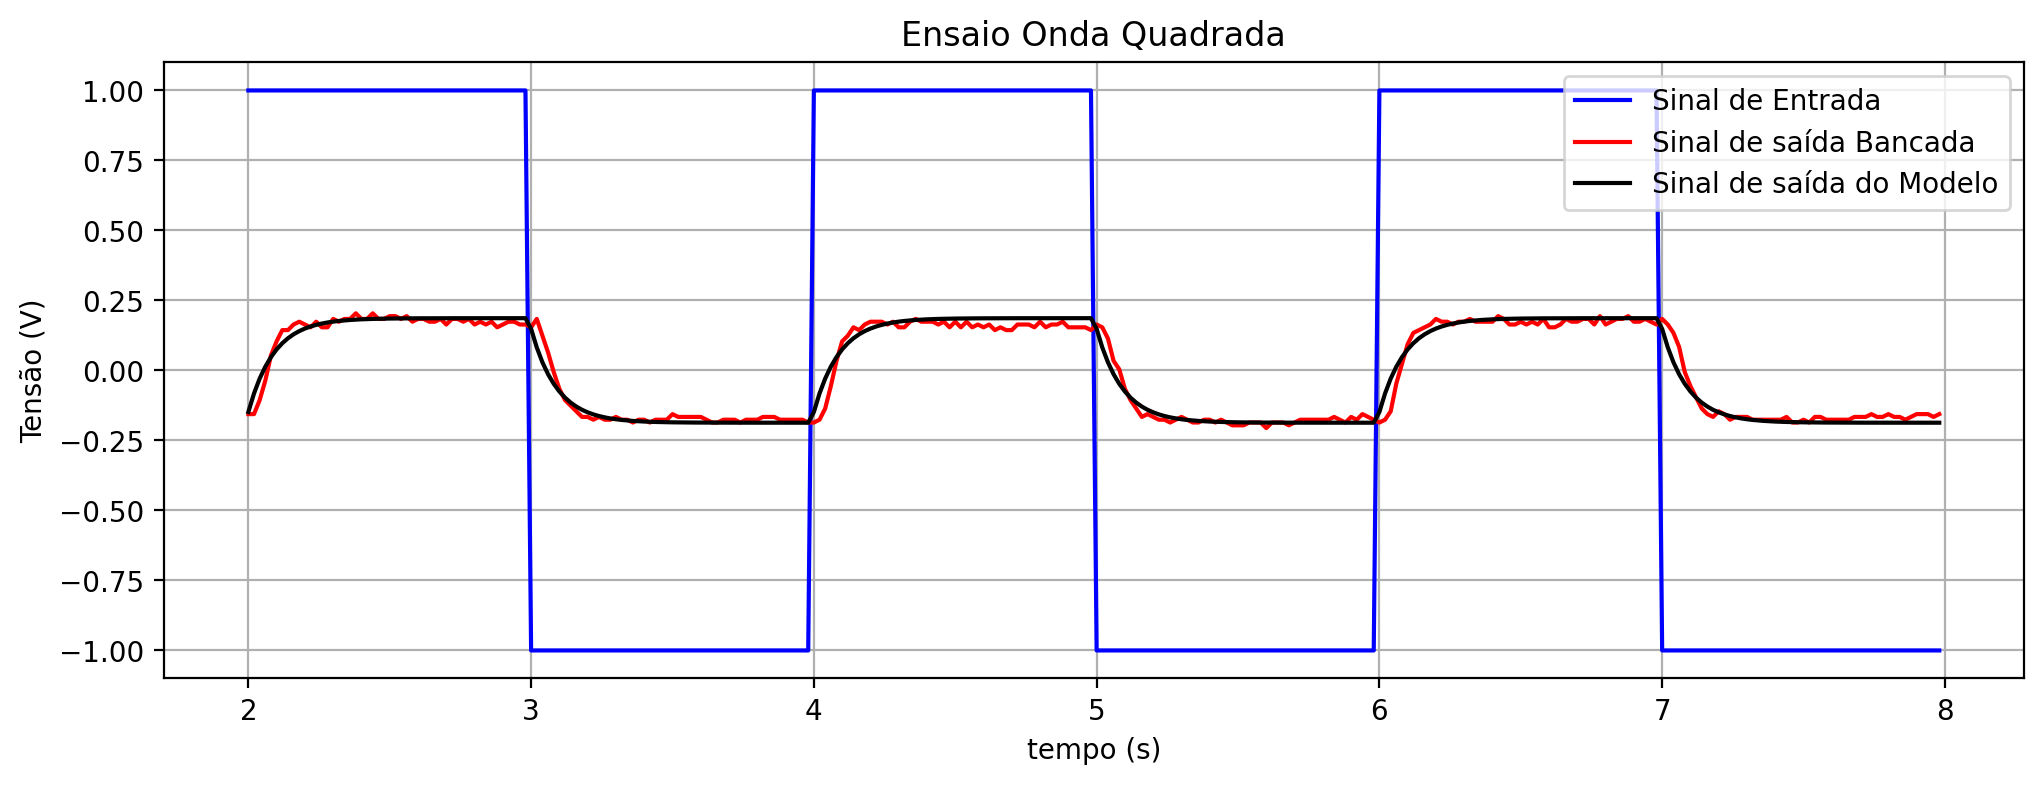

In [63]:
num = [km]
den = [tau, 1]

Gs = ct.tf(num, den)
tempo1, saida_modelo = ct.forced_response(Gs, T=tempo, U=sinal_entrada)


# Tirando a média para subtrair o Nível DC do modelo
nivel_dc_modelo = np.mean(saida_modelo[janela])
saida_sem_dc_modelo = saida_modelo[janela] - nivel_dc_modelo

# Plotagem dos gráficos dos sinais de entrada e saída sem nível DC
plt.figure(figsize=(12, 4))
plt.plot(tempo[janela],r[janela], c = 'b', label = "Sinal de Entrada")
plt.plot(tempo[janela], y[janela], 'r', label = "Sinal de saída Bancada")
plt.plot(tempo[janela], saida_sem_dc_modelo, 'k', label = "Sinal de saída do Modelo")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()


Ao comparar a resposta do sistema real e do modelo encontrada, é possível concluir que o processo de identificação do sistema foi realizado corretamente, já que o sinal de saída do modelo se aproxíma do sistema real, porém, como o sistema real é não linear, se observa que o modelo encontrado não tem como saída exatamente a resposta desejada.

#### Gráfico do sinal de saída do modelo encontrado e do sistema real

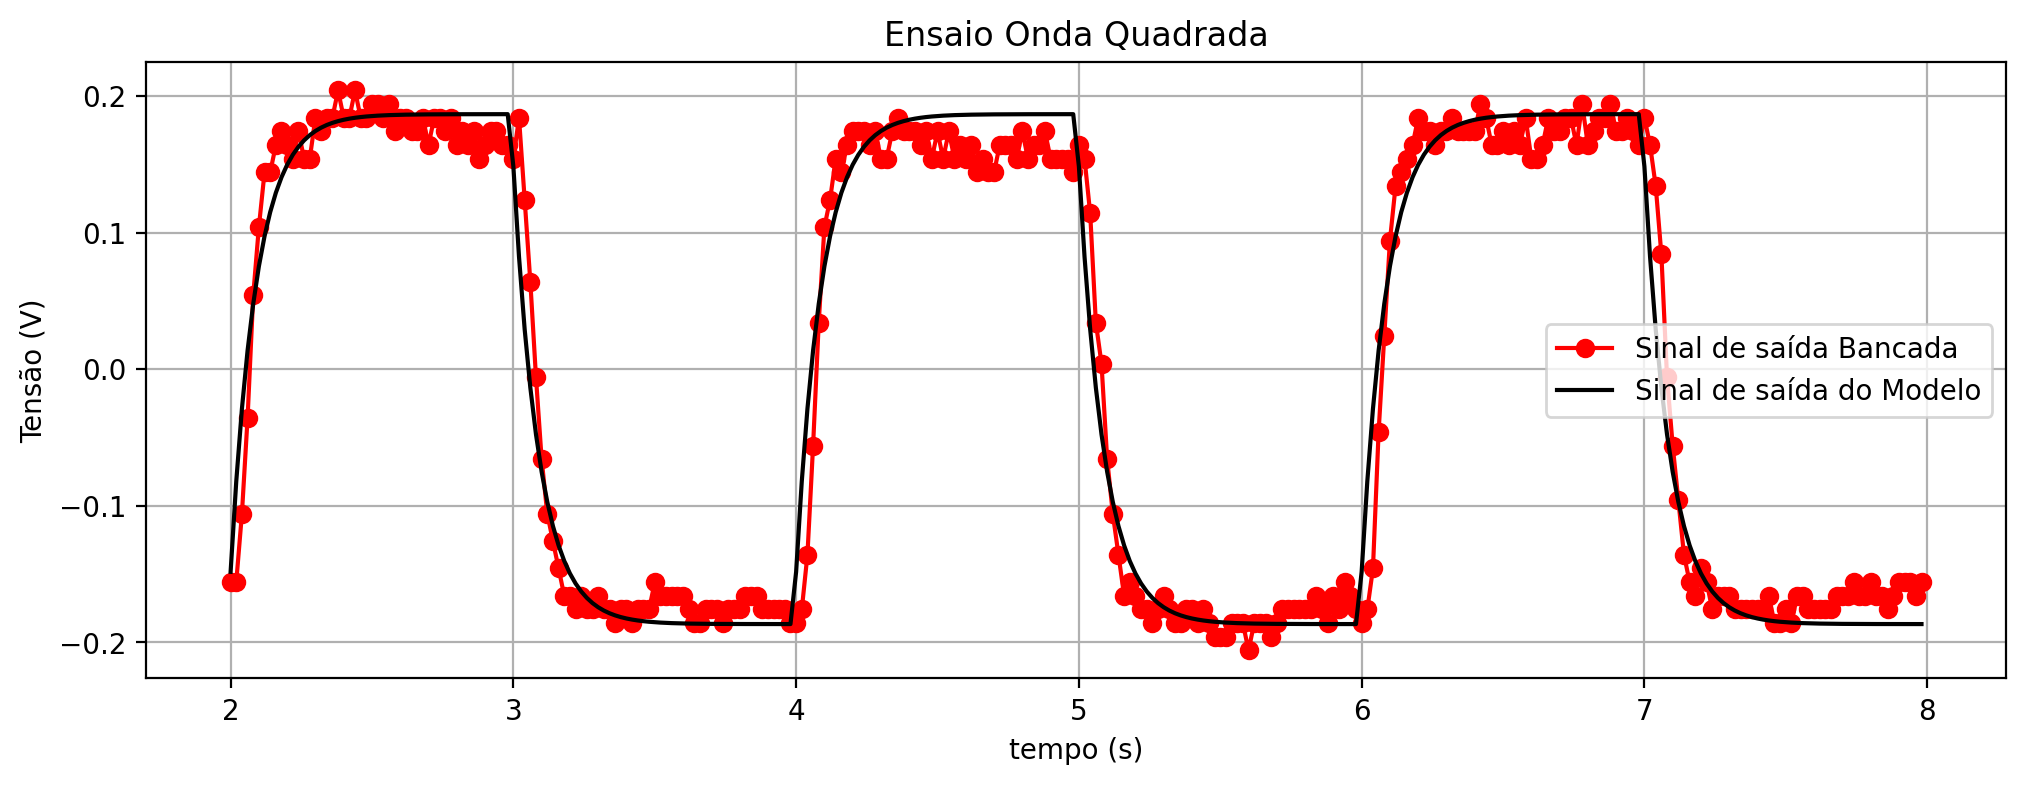

In [60]:
# Plotagem dos gráficos dos sinais de entrada e saída sem nível DC
plt.figure(figsize=(12, 4))
plt.plot(tempo[janela], y[janela], '-or', label = "Sinal de saída Bancada")
plt.plot(tempo[janela], saida_sem_dc_modelo, 'k', label = "Sinal de saída do Modelo")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

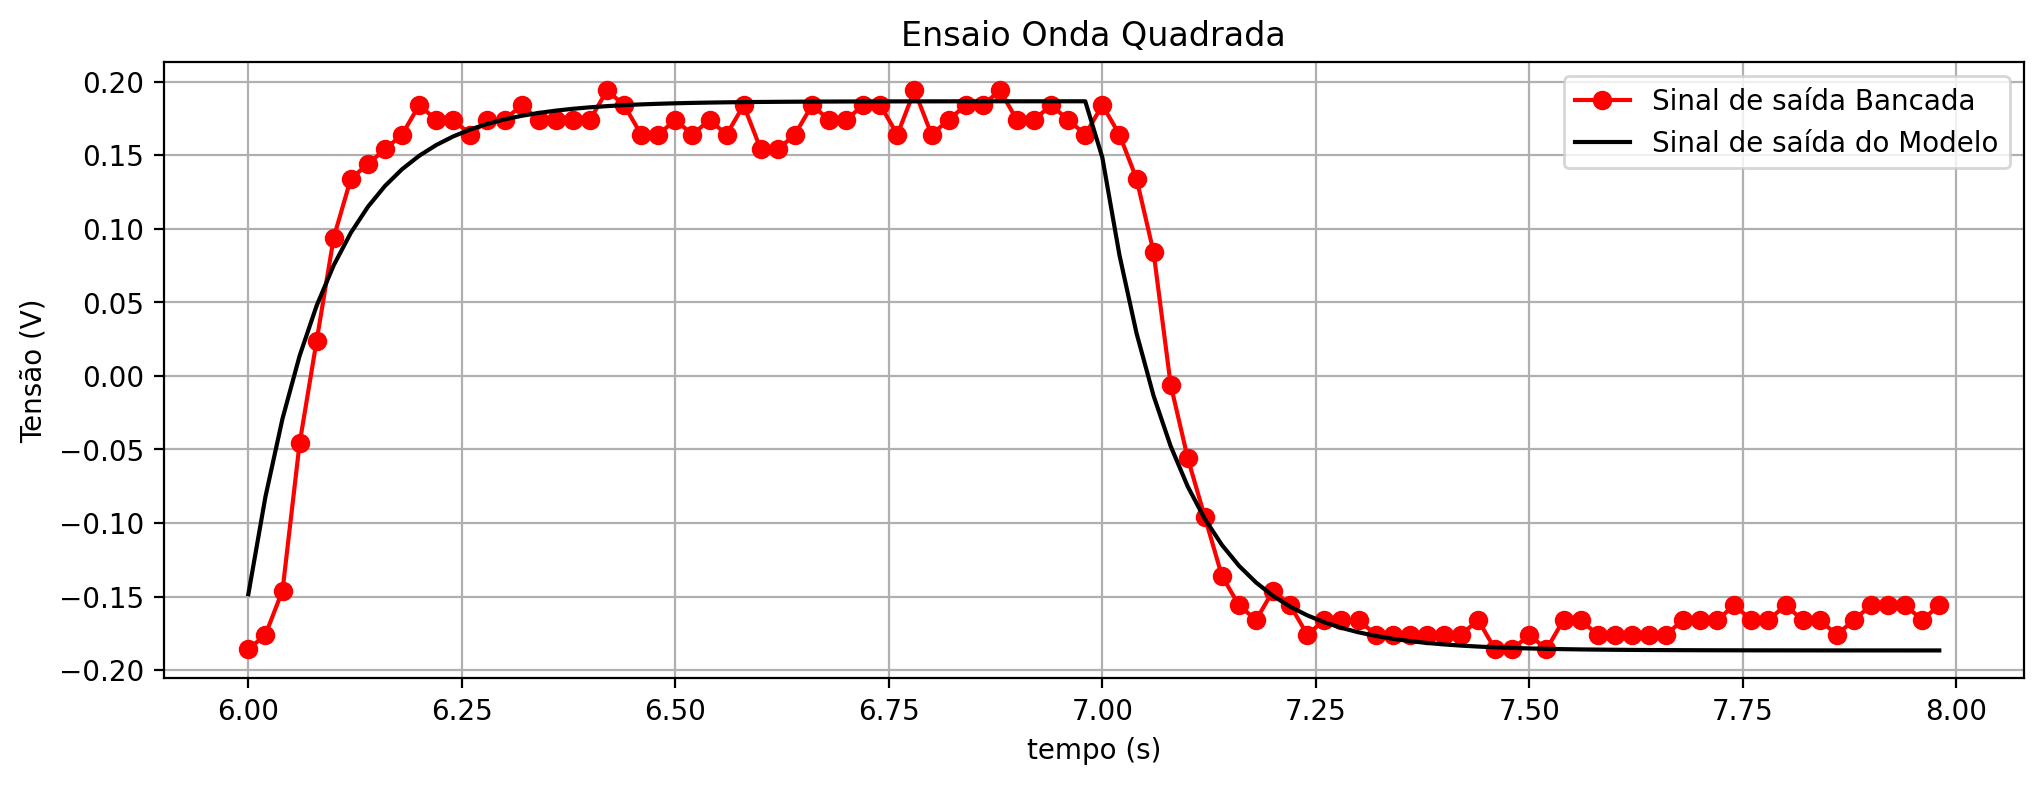

In [61]:
# Plotagem dos gráficos dos sinais de entrada e saída sem nível DC
plt.figure(figsize=(12, 4))
plt.plot(tempo[janela][200:400], y[janela][200:400], '-or', label = "Sinal de saída Bancada")
plt.plot(tempo[janela][200:400], saida_sem_dc_modelo[200:400], 'k', label = "Sinal de saída do Modelo")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

## Conclusão

A identificação de sistemas, portanto, é uma excelente maneira de encontrar uma aproximação do comportamento do sistema real para um determinado ponto de operação, no entanto, desse ter em mente que para cada ponto de operação será necessário encontrar um modelo especifico.